In [43]:
%load_ext autoreload
%autoreload 2

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from ig_pkg.models.generator import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import torch
x = torch.rand((3, 224, 224))
uniform = torch.distributions.uniform.Uniform(low = x.min(), high = x.max())
baseline = uniform.sample(x.size())
print(baseline.size())
print(baseline.min())
print(baseline.max())
print(baseline.mean())

torch.Size([3, 224, 224])
tensor(1.1563e-05)
tensor(1.0000)
tensor(0.5013)


In [7]:
normal = torch.distributions.normal.Normal(loc = torch.tensor([0.0]), scale = torch.tensor([1.0]))
noise = normal.sample(x.size())
print(noise.size())

torch.Size([3, 224, 224, 1])


In [6]:
new = torch.round(baseline)
# img_t = convert_to_img(new)
# plt.imshow(img_t)
new

tensor([[[1., 0., 0.,  ..., 1., 1., 0.],
         [0., 1., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 1.],
         [1., 1., 1.,  ..., 1., 1., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.]],

        [[1., 1., 1.,  ..., 1., 0., 0.],
         [0., 1., 1.,  ..., 1., 0., 1.],
         [1., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 1., 1.],
         [0., 1., 1.,  ..., 1., 1., 0.]],

        [[1., 1., 1.,  ..., 0., 1., 0.],
         [0., 0., 1.,  ..., 1., 0., 0.],
         [0., 1., 1.,  ..., 0., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [0., 1., 0.,  ..., 1., 1., 1.],
         [1., 0., 1.,  ..., 0., 1., 0.]]])

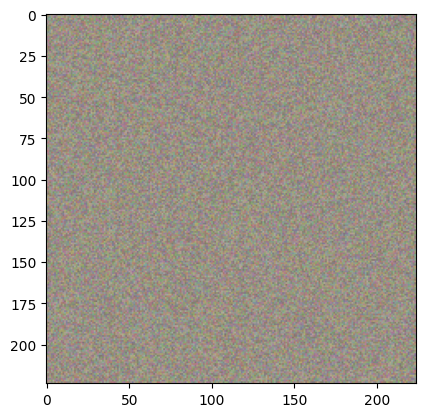

In [4]:
import matplotlib.pyplot as plt
from misc import *
img_t = convert_to_img(baseline)
plt.imshow(img_t)


In [47]:
g = Gen_wrapper(name_model='stylegan', 
                path = '../../pretrained_model/stylegan_cats256.pt',
                res = 256, 
                )

latent = g.sample(1)
img = g.decode(latent).detach()                
print(img.size())
zzz = g.encode(img)


torch.Size([1, 3, 256, 256])
Optimizing latent representation ...


  4%|▍         | 198/5000 [02:31<1:05:03,  1.23it/s, loss=0.267, step=198]

In [35]:
a = torch.zeros((1, 2))
a.requires_grad = True
b = a.clone()


a

tensor([[0., 0.]], requires_grad=True)

In [16]:
from PIL import Image
im = Image.open('ig_pkg/inputattribs/figjpg.jpg').convert('RGB')

In [22]:
# import torchvision

img = torchvision.transforms.ToTensor(im) 
img.size()

TypeError: __init__() takes 1 positional argument but 2 were given

In [21]:
import numpy as np
im = np.array(im) 